# Visual Impact Assesment
As part of the Environmental Impact Assessment preceding the construction of a wind park, the visual impact of integrating the wind turbines into the landscape is assessed by simulating their placement in nearby images. To accurately represent the turbines, it is crucial that they are appropriately warped and scaled within the image, providing a proper understanding of their impact on the landscape. In this program, image data is retrieved from Google Street View through their API. Subsequently, the turbines are inserted into the image by converting a .obj file to an image and appropriately scaling it using a pinhole camera model.

In [1]:
import os
from pathlib import Path
import sys
sys.path.append(str(Path(os.getcwd()).parent.parent))
from src.utils import ElevationHandler, visual_impact_assesment, calc_extent, import_point_source_data
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'src.utils'

## Test of function
Here are three instances showcasing the code in action. It is versatile enough to accommodate either pre-existing .json files or directly utilize pandas dataframes as input.

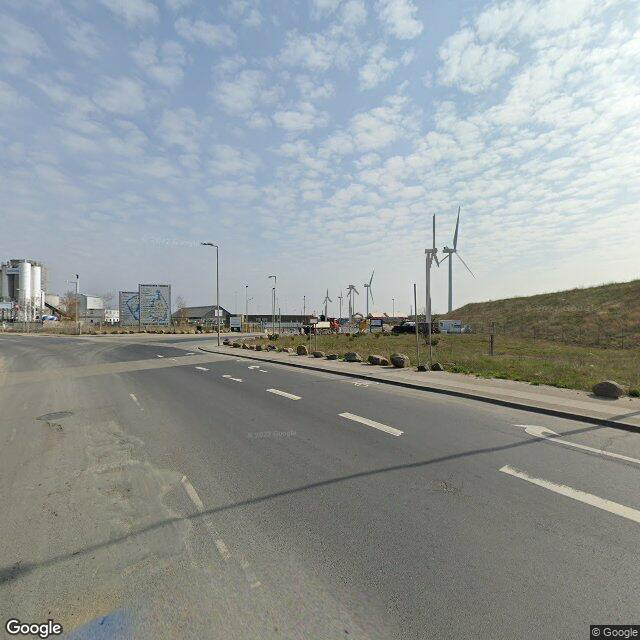

In [2]:
point_source_data = import_point_source_data("Prøvestenen.json") # load wind park data
map_shape = [50, 50] # resolution of map data (in pixels)
dist = 3000 # distance from turbines to the edge of the map (in meters)
map_boundaries = calc_extent(point_source_data, dist) # calculate map boundaries (min/max longitude and latitude)
elevation_handler = ElevationHandler(map_boundaries, map_shape) # Initiate Elevation Handler (Takes care of the map downloads)
camera_coord = [12.633587898367413, 55.6716853762531] # 55., 12.
theta = np.array([90, 0, 60]) # roll, tilt and yaw (tilt should be 0)

visual_impact_assesment(elevation_handler, point_source_data, camera_coord, theta, fov = [90, 90])

The figure above illustrates that, owing to minor inaccuracies in the calculation method—likely stemming from slight discrepancies in the Coordinate Reference Systems employed—the turbine positions do not precisely align with their real-world counterparts. Nevertheless, the scaling of the turbines is notably accurate, and their positions deviate by no more than a few meters, as evident in the depiction.

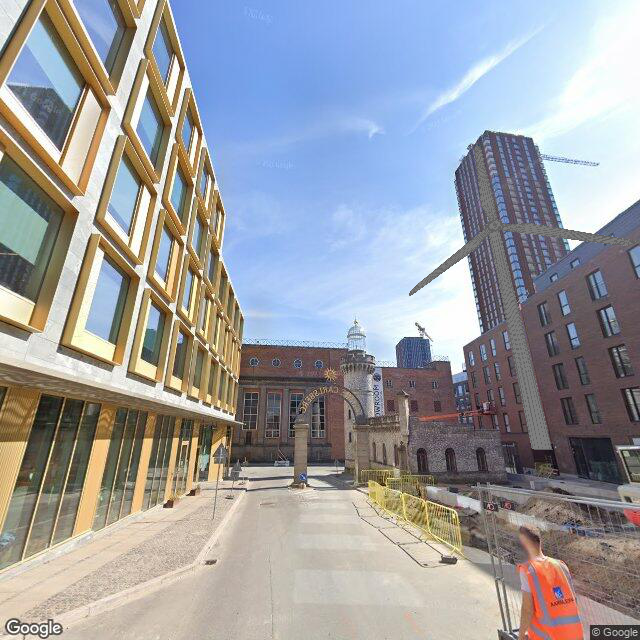

In [3]:
point_source_data = pd.DataFrame(data = [{"latitude": 55.66533363371845,
        "longitude": 12.533636688214754,
        "h": 80,
        "d" : 100,
        "wind_dir" : 220}])
map_shape = [50, 50]
dist = 1000 
map_boundaries = calc_extent(point_source_data, dist) 
elevation_handler = ElevationHandler(map_boundaries, map_shape) 
camera_coord = [12.5321515, 55.666176] 
theta = np.array([70, 0, 100]) # roll, tilt and yaw (tilt should be 0)

visual_impact_assesment(elevation_handler, point_source_data, camera_coord, theta, fov = [90, 90])

In the depicted image, a single turbine is positioned within Pasteurs Tårn in Copenhagen, as an illustration of the program's capability to handle the warping of the turbine object. As the turbine approaches the image border, a subtle stretching effect is expected. Additionally, observe the alignment of the turbine's height (130 meters), which is nearly equivalent to that of Pasteurs Tårn (128 meters).

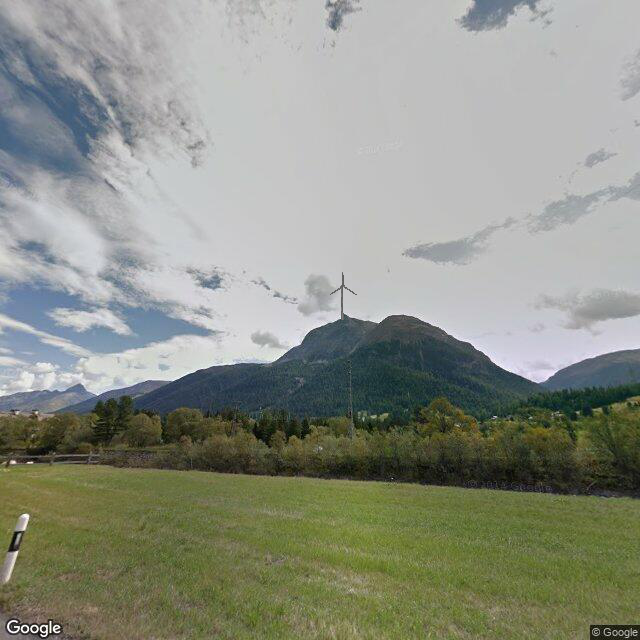

In [4]:
point_source_data = pd.DataFrame(data = [{"latitude": 46.569692885046436,
        "longitude": 9.965257138033463,
        "h": 500,
        "d" : 200,
        "wind_dir" : 220}])
map_shape = [50, 50]
dist = 5000 
map_boundaries = calc_extent(point_source_data, dist) 
elevation_handler = ElevationHandler(map_boundaries, map_shape) 
camera_coord = [9.923683012770276, 46.57725126807395] 
theta = np.array([70, 0, 100]) # roll, tilt and yaw (tilt should be 0)

visual_impact_assesment(elevation_handler, point_source_data, camera_coord, theta, fov = [90, 90])

In the example above, the program demonstrates its elevation handling capabilities. The individual heights of both the camera and turbine are considered during the placement of the turbine within the image. Consequently, it is crucial that the `map_boundaries` of the `ElevationHandler` encompasses both the camera and turbine coordinates.